# Duże modele tekstowe

<img src=" 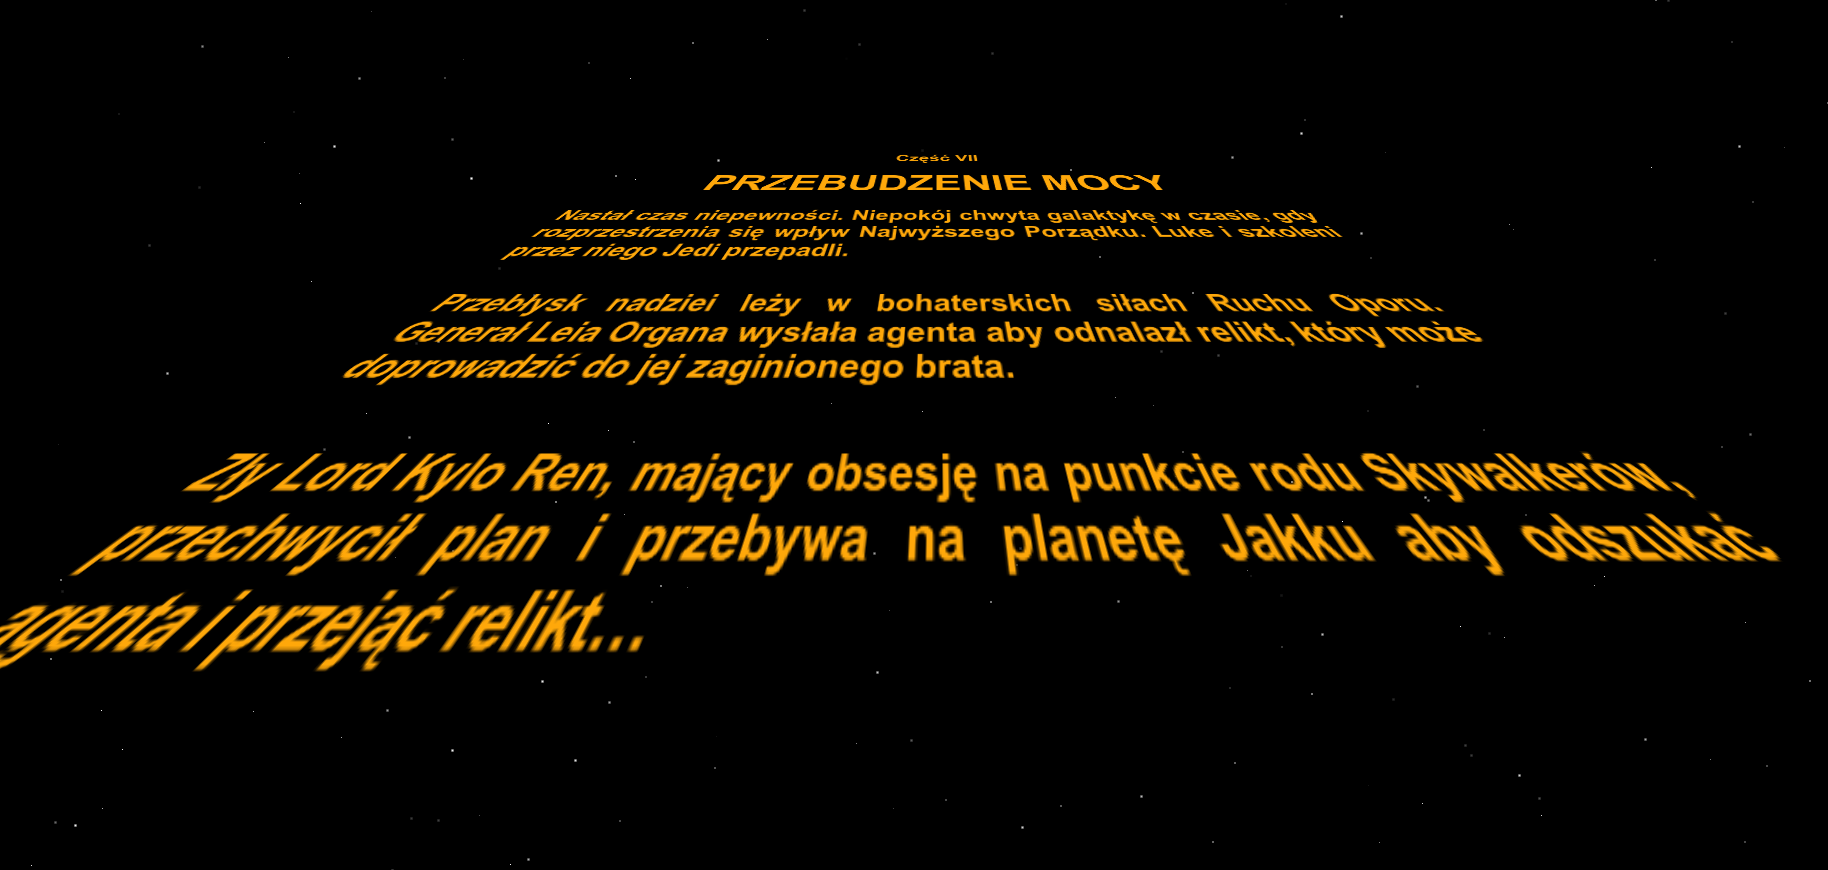" />

Nastał czas niepewności. Niepokój chwyta galaktykę w czasie, gdy rozprzestrzenia się wpływ Najwyższego Porządku.
Luke i szkoleni przez niego Jedi przepadli.

Przebłysk nadziei leży w bohaterskich siłach Ruchu Oporu. Generał Leia Organa wysłała agenta aby odnalazł relikt, który może doprowadzić do jej zaginionego brata.

Zły Lord Kylo Ren, mający obsesję na punkcie rodu Skywalkerów, przechwycił plan i przebywa na planecie Jakku aby odszukać agenta i przejąć relikt…

[Napisy początkowe filmu Gwiezdne Wojny Epizod VII: Przebudzenie Mocy]

In [ ]:
intro_text = """Luke Skywalker has vanished.

In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed.

With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy.

Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts..."""

### Import bibliotek i modeli

Modele dostępne na stronie <a href="https://huggingface.co/models" />huggingface.co/models</a>

### Generowanie tekstu

#### Parametry
- temperature (float, opcjonalnie, domyślnie 1,0) — Wartość używana do modulowania prawdopodobieństw następnego tokenu.
- max_new_tokens (int, opcjonalne, domyślnie Brak) — Maksymalna liczba tokenów do wygenerowania, ignorując bieżącą liczbę tokenów.
- repetition_penalty - kara za powtórzenia
- no_repeat_ngram_size - maksymalna długość powtórzonej frazy
- num_return_sequences(int, opcjonalny, domyślnie 1) — Liczba niezależnie obliczonych zwróconych sekwencji dla każdego elementu w sekwencji

In [ ]:
!pip install keytotext
!pip install torch
!pip install transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [5]:
from keytotext import pipeline
from transformers import FSMTForConditionalGeneration, FSMTTokenizer
import warnings
warnings.filterwarnings("ignore")
from transformers import AutoTokenizer, AutoModelWithLMHead, pipeline

def download_model(model_name: str, pipe_type='text-generation'):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelWithLMHead.from_pretrained(model_name)
    pipe = pipeline(pipe_type, model=model, tokenizer=tokenizer)
    return pipe

ModuleNotFoundError: No module named 'keytotext'

#### GPT-2

In [6]:
pipe = download_model("gpt2")
text_generated = pipe(intro_text, max_new_tokens=200,temperature=0.1)

print(text_generated[0]['generated_text'])

NameError: name 'download_model' is not defined

In [ ]:
# Kara za powtórzenia
pipe = download_model("gpt2")
text_generated = pipe(intro_text, max_new_tokens=200,temperature=0.1, repetition_penalty=0.1)

print(text_generated[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Luke Skywalker has vanished.

In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed.

With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy.

Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts...

... in the absence of Leia's brother... Leia is not in a galaxy to rest on her last. She will not rest until her brother is the last Jedi.

Leia is not a Jedi, of a Jedi. She has been sent to the Jedi's secret mission. She has been a Jedi the last Jedi to find the last Jedi.

Leia has been a Jedi. She has been sent to the Jedi's secret mission. She has been a Jedi the last Jedi to find the last Jedi.

Leia has been a Jedi. She has been sent to the Jedi's secret mission. She has been a Jedi the l

In [ ]:
# Wymuszenie zatrzymania przy powtórzeniach
pipe = download_model("gpt2")
text_generated = pipe(intro_text, max_new_tokens=200,temperature=0.1, no_repeat_ngram_size = 2)

print(text_generated[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Luke Skywalker has vanished.

In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed.

With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy.

Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts...
...
 (Star Wars: Episode IV A New Hope)
, a new chapter in the saga of Luke Skywalker and the Rebellion. The Rebellion is now in full swing, and Luke is on the run from his father, Darth Vader. His father's death has left Luke with no choice but to fight for his son. But when the young Jedi Master, Luke, is captured by the evil Empire, he must choose between his own life and his brother's. Luke must find his way back to his home planet of Jakka, save his life, or face the consequences of his acti

In [ ]:
# Wysoka temperatura
pipe = download_model("gpt2")
text_generated = pipe(intro_text, max_new_tokens=200,temperature=0.99, no_repeat_ngram_size = 2)

print(text_generated[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Luke Skywalker has vanished.

In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed.

With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy.

Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts... A world of danger. As Leia prepares, Luke is struck by a bright light that will allow his body to enter space as he is about to depart. Amidst her efforts she can finally pull the trigger and become one with the Jedi Master.


In [ ]:
# Wysoka temperatura
pipe = download_model("gpt2")
text_generated = pipe(intro_text, max_new_tokens=200,temperature=0.99, no_repeat_ngram_size = 2)

print(text_generated[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Luke Skywalker has vanished.

In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed.

With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy.

Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts... and then Luke is dead. Leia steps up her boldness and brings about the Resistance, and the final victory of her campaign. In the name of freedom and truth, Leia joins the rebellion to save the Republic. But she is far too late. Skywalker's return must come soon after, to give hope to one of human race's greatest heroes. Written by Mandy


#### GPT-J

In [ ]:
pipe = download_model('hf-internal-testing/tiny-random-gptj')
text_generated = pipe(intro_text, max_new_tokens=50,temperature=0.1, do_sample=True, top_k=20, num_return_sequences=3)

print(text_generated[0]['generated_text'])

tokenizer_config.json:   0%|          | 0.00/225 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

Luke Skywalker has vanished.

In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed.

With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy.

Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts... 18 proorn they backithaseorld C aboutachavemeric�ine F while –� otherach��urch�s amchather@ally I Un Rff AtenU bet Un otherey F publ0 te Mince – publ


### Tłumaczenie tekstu

In [ ]:
mname = "facebook/wmt19-en-de"
tokenizer = FSMTTokenizer.from_pretrained(mname)
model = FSMTForConditionalGeneration.from_pretrained(mname)

input_ids = tokenizer.encode(intro_text, return_tensors="pt")
outputs = model.generate(input_ids)
de_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

de_text

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

ImportError: You need to install sacremoses to use XLMTokenizer. See https://pypi.org/project/sacremoses/ for installation.